In [1]:
from google.colab import files
uploaded = files.upload()


Saving auto-mpg.csv to auto-mpg.csv
Saving StudentsPerformance.csv to StudentsPerformance.csv


SWASTHIKA M 24BAD121
MSE: 207.91715060774996
RMSE: 14.419332529897144
R2 Score: 0.030085923188504338


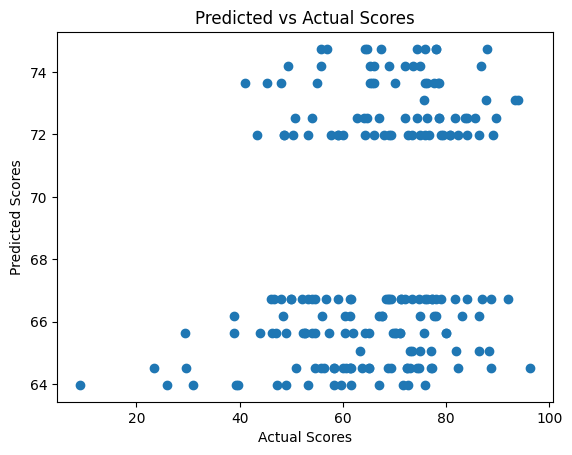

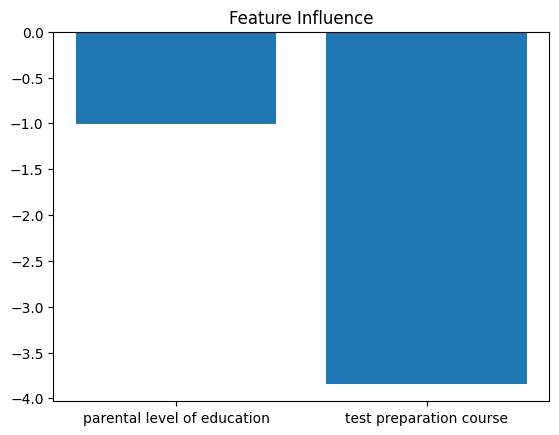

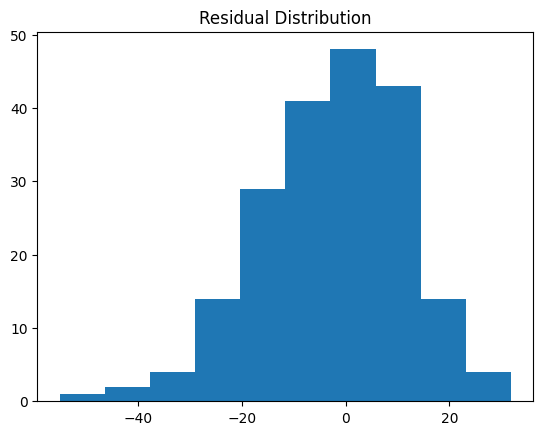

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
print("SWASTHIKA M 24BAD121")
df = pd.read_csv("StudentsPerformance.csv")

df['Final_Score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

le = LabelEncoder()
df['parental level of education'] = le.fit_transform(df['parental level of education'])
df['test preparation course'] = le.fit_transform(df['test preparation course'])

X = df[['parental level of education', 'test preparation course']]
y = df['Final_Score']

X = X.fillna(X.mean())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Predicted vs Actual Scores")
plt.show()

plt.bar(X.columns, model.coef_)
plt.title("Feature Influence")
plt.show()

residuals = y_test - y_pred
plt.hist(residuals)
plt.title("Residual Distribution")
plt.show()


SWASTHIKA M 24BAD121

Degree: 2
MSE: 13.760855128148759
RMSE: 3.7095626599572027
R2 Score: 0.7440623896917349


/tmp/ipython-input-1925575594.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


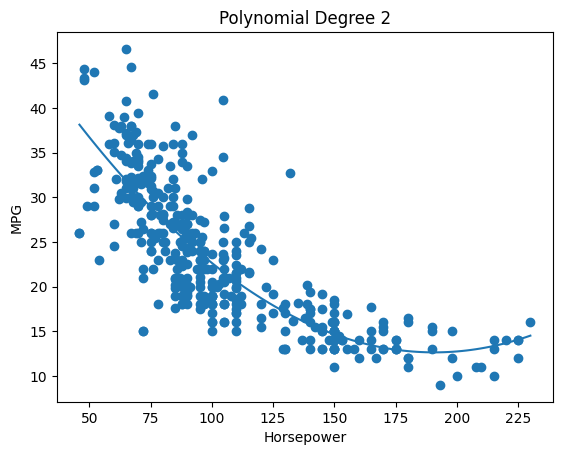


Degree: 3
MSE: 13.813374257439795
RMSE: 3.71663480280748
R2 Score: 0.7430855884449342


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


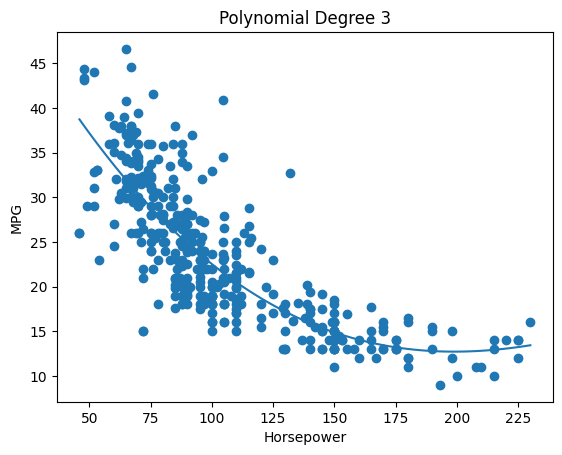


Degree: 4
MSE: 14.118024021271236
RMSE: 3.7573959095723777
R2 Score: 0.7374194193144635


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


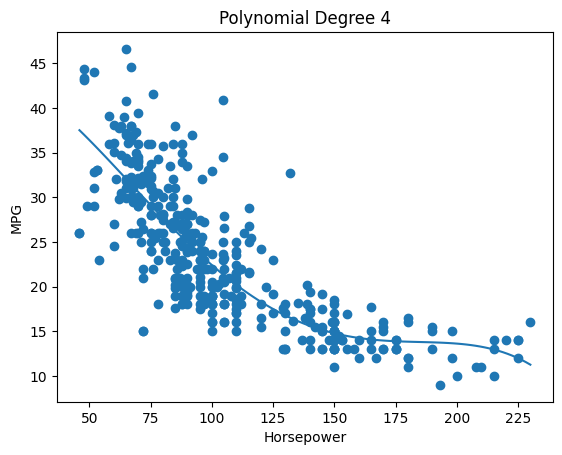

Ridge(alpha=1)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
print("SWASTHIKA M 24BAD121")
df = pd.read_csv("auto-mpg.csv")

df['horsepower'] = df['horsepower'].replace('?', np.nan)
df['horsepower'] = df['horsepower'].astype(float)
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)

X = df[['horsepower']]
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for degree in [2, 3, 4]:
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    y_pred = model.predict(X_poly_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print("\nDegree:", degree)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2 Score:", r2)

    X_line = np.linspace(X.min(), X.max(), 100)
    X_line_poly = poly.transform(X_line)

    plt.scatter(X, y)
    plt.plot(X_line, model.predict(X_line_poly))
    plt.xlabel("Horsepower")
    plt.ylabel("MPG")
    plt.title(f"Polynomial Degree {degree}")
    plt.show()

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_train)

ridge = Ridge(alpha=1)
ridge.fit(X_poly, y_train)
